# Image Collection to xarray

In this tutorial, we'll look at how we can use `wxee` and the `wx` accessor to convert an `ee.ImageCollection` of gridMET weather data to an `xarray.Dataset` for visualization and further processing.

## Setup

In [ ]:
!pip install wxee

In [1]:
import ee
import wxee

ee.Authenticate()
wxee.Initialize()

## Converting to xarray

Load the gridMET image collection.

In [2]:
gridmet = ee.ImageCollection("IDAHO_EPSCOR/GRIDMET")

Select a date range of the collection to download to xarray. gridMET has 1 image per day, so this will give us 6 images.

In [3]:
collection = gridmet.filterDate("2020-09-05", "2020-09-11")

Set the download parameters. We'll use the full gridMET image extent of the continental US, but if we wanted to select a specific region we could pass an `ee.Geometry.Polygon` to the `region` argument.

In [4]:
# The coordinate reference system to use (NAD83 Albers CONUS)
crs = "EPSG:5070"
# Spatial resolution in CRS units (meters)
scale = 20_000

The `wx` accessor extends images and image collections with additional functionality including `to_xarray`. We'll use that to download the collection, storing it in memory as an `xarray.Dataset`.

In [5]:
arr = collection.wx.to_xarray(scale=scale, crs=crs)

Requesting:   0%|          | 0/6 [00:00<?, ?it/s]

Downloading:   0%|          | 0/6 [00:00<?, ?it/s]

<div class="alert alert-block alert-info">
<b>Tip:</b> If the download fails due to a DownloadError, retry or increase the max_attempts argument.
</div>

The downloaded array has 6 time coordinates (1 for each image) and 16 variables (1 for each band).

In [7]:
arr

<xarray.Dataset>
Dimensions:  (time: 6, y: 154, x: 292)
Coordinates:
  * time     (time) datetime64[ns] 2020-09-05T06:00:00 ... 2020-09-10T06:00:00
  * y        (y) float64 3.27e+06 3.25e+06 3.23e+06 ... 2.5e+05 2.3e+05 2.1e+05
  * x        (x) float64 -2.91e+06 -2.89e+06 -2.87e+06 ... 2.89e+06 2.91e+06
Data variables: (12/16)
    pr       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    rmax     (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    rmin     (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    sph      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    srad     (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    th       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    ...       ...
    eto      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    bi       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    fm100    (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    fm1000   (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    etr      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    vpd      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    transform:               (20000.0, 0.0, -2920000.0, 0.0, -20000.0, 328000...
    crs:                     +init=epsg:5070
    res:                     (20000.0, 20000.0)
    is_tiled:                1
    nodatavals:              (-32768.0,)
    scales:                  (1.0,)
    offsets:                 (0.0,)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

## Visualizing

Let's calculate the max wind velocity over the time dimension and plot it.

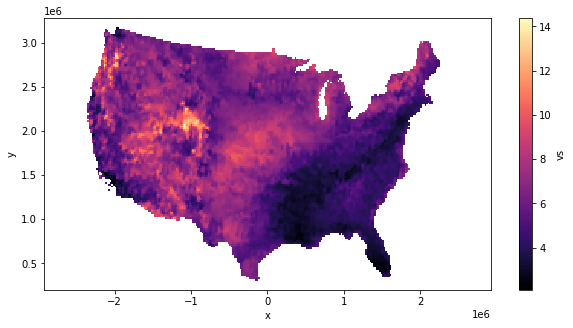

In [8]:
arr.vs.max("time").plot(figsize=(10, 5), cmap="magma")

Going a little further, let's calculate the Hot-Dry-Windy (HDW) index and see how it changed over the 6 days.

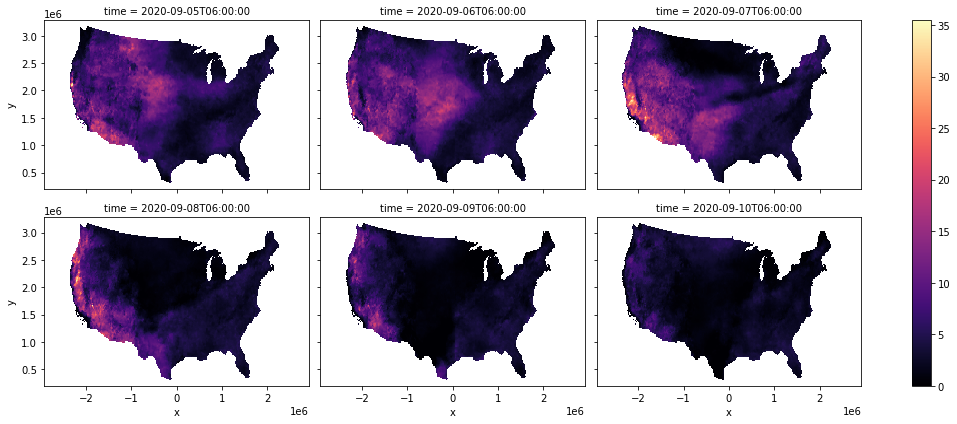

In [9]:
hdw = arr.vs * arr.vpd

hdw.plot(col="time", col_wrap=3, cmap="magma", figsize=(15, 6))